# Simple Linear Regression (without using library)

### Importing Required Packages and Importing Dataset

In [1]:
#import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import required dataset into pandas dataframe
data=pd.read_csv("E:/DataSets/headbrain.csv")

In [3]:
print("Dataset Shape : ", data.shape)
data.head()

Dataset Shape :  (237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


**Splitting the Data**

In [4]:
train = data[:200]
test = data[200:]

### Modelling the Regression Line and Testing it

**Regression Line for Training Data**

In [5]:
X=train['Head Size(cm^3)'].values
Y=train['Brain Weight(grams)'].values
size=len(X)
print(size)

200


In [6]:
#obtain the mean values
meanX = np.mean(X)
meanY = np.mean(Y)
print("Mean of X values : ", meanX)
print("Mean of Y values : ", meanY)

Mean of X values :  3679.225
Mean of Y values :  1299.01


In [7]:
#calculating the slope and y-intercept for the regression line
numerator=0
denominator=0
for i in range(size):
    numerator += (X[i]-meanX)*(Y[i]-meanY)
    denominator += (X[i]-meanX)**2
b1=numerator/denominator
b0 = meanY - (b1*meanX)
print(b1,b0)

0.24984027563731726 379.79141186829145


**Results for Training Data**

In [8]:
#calculate the Mean Square Error and Root Mean Square Error
se=0
mse=0
rmse=0
ss_r=0
ss_t=0
for i in range(size):
    Y_pred = (b1*X[i]) + b0
    se += (Y[i]-Y_pred)**2
mse = se/size
print("Mean Square Error = ",mse)
rmse = np.sqrt(mse)
print("Root Mean Sqaure Error = ",rmse)

#calculate the Rsquare aka coefficient of determination
for i in range(size):
    Y_pred = b0 + b1 * X[i]
    ss_t = (Y[i] - meanY) ** 2
    ss_r = (Y[i] - Y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print("R^2 score for training data = ",r2)

Mean Square Error =  5347.944962843047
Root Mean Sqaure Error =  73.12964489755879
R^2 score for training data =  0.9564664299958757


**Regression Line for Test Data**

In [9]:
X1=test['Head Size(cm^3)'].values
Y1=test['Brain Weight(grams)'].values
size1=len(X1)
print(size1)

37


In [10]:
#obtain the mean values
meanX1 = np.mean(X1)
meanY1 = np.mean(Y1)
print("Mean of X values : ", meanX1)
print("Mean of Y values : ", meanY1)

Mean of X values :  3389.4864864864867
Mean of Y values :  1195.6486486486488


In [11]:
#calculating the slope and y-intercept for the regression line
numerator1=0
denominator1=0
for i in range(size1):
    numerator1 += (X1[i]-meanX1)*(Y1[i]-meanY1)
    denominator1 += (X1[i]-meanX1)**2
b1=numerator1/denominator1
b0 = meanY1 - (b1*meanX1)
print(b0,b1)

213.38416260559086 0.289797433906062


**Results for Test Data**

In [12]:
#calculate the Mean Square Error and Root Mean Square Error
se1=0
mse1=0
rmse1=0
ss_r1=0
ss_t1=0
for i in range(size1):
    Y_pred = (b1*X1[i]) + b0
    se1 += (Y1[i]-Y_pred)**2
mse1 = se1/size
print("Mean Square Error = ",mse1)
rmse1 = np.sqrt(mse1)
print("Root Mean Sqaure Error = ",rmse1)

#calculate the Rsquare aka coefficient of determination
for i in range(size1):
    Y_pred = b0 + b1 * X1[i]
    ss_t1 = (Y1[i] - meanY1) ** 2
    ss_r1 = (Y1[i] - Y_pred) ** 2
r21 = 1 - (ss_r1/ss_t1)
print("R^2 score for training data = ",r21)

Mean Square Error =  665.4971482043476
Root Mean Sqaure Error =  25.797231405799103
R^2 score for training data =  -0.011629655827626761


### Visualizing the Data

**Plot with Actual Points and the Regression Line obtained for Training Data**

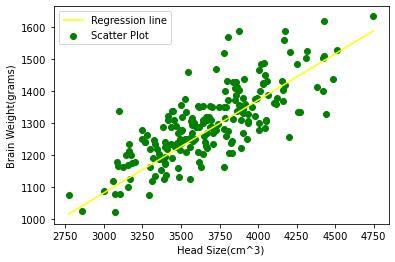

In [13]:
#the yellow straight line shows the regression line
max_X = np.max(X)
min_X = np.min(X)
x = np.linspace(min_X,max_X)
y = (b1*x)+b0
plt.plot(x,y,color='yellow',label='Regression line')
#the green scatter plot show the train data points
plt.scatter(X,Y,color='green',label='Scatter Plot')
#add plot labels
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

**Plot with Actual Points and the Regression Line obtained for Test Data**

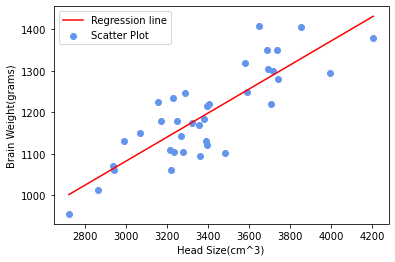

In [14]:
#the red straight line shows the regression line
max_X = np.max(X1)
min_X = np.min(X1)
x = np.linspace(min_X,max_X)
y = (b1*x)+b0
plt.plot(x,y,color='RED',label='Regression line')
#the blue scatter plot show the train data points
plt.scatter(X1,Y1,color='cornflowerblue',label='Scatter Plot')
#add plot labels
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

**Training vs Test MSE(Mean Square Error)**

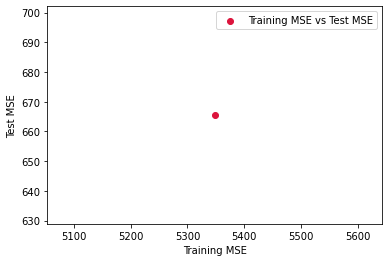

In [15]:
# plot trainig vs test MSE
plt.scatter(mse, mse1, c='crimson', label='Training MSE vs Test MSE')
plt.xlabel('Training MSE')
plt.ylabel('Test MSE')
plt.legend()
plt.show()

**Training vs Test RMSE(Root Mean Square Error)**

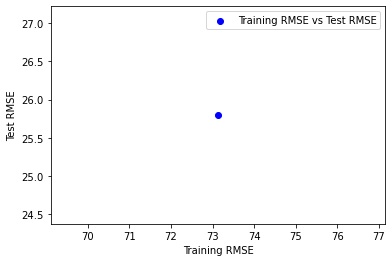

In [16]:
# plot trainig vs test RMSE
plt.scatter(rmse, rmse1, c='blue', label='Training RMSE vs Test RMSE')
plt.xlabel('Training RMSE')
plt.ylabel('Test RMSE')
plt.legend()
plt.show()